# Churn Prediction Project - Exploratory Data Analysis


---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization

---


## 1) Importing Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

---

## 2. Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python

In [5]:
client_df = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\Learnigs\\Data Science Project\\client_data.csv')

In [6]:
price_df = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\Learnigs\\Data Science Project\\price_data.csv')

In [7]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [8]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that we're dealing with along with the data types of each column. The data types may dictate how we can transform and engineer features.

In [10]:
client_df.shape

(14606, 26)

In [11]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

### Statistics

Now let's look at some statistics about the datasets

In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [13]:
price_df.shape

(193002, 8)

In [14]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [16]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221




## 3. Data visualization

Now let's dive a bit deeper into the dataframes

In [22]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### CHURN

In [18]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
churn_percentage = churn_percentage.reset_index()

In [19]:
churn_percentage

,churn,Companies
0,0,90.284814
1,1,9.715186


In [20]:
client_df.head(3) 

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


Text(0.5, 1.0, 'Churn Status(in %)')

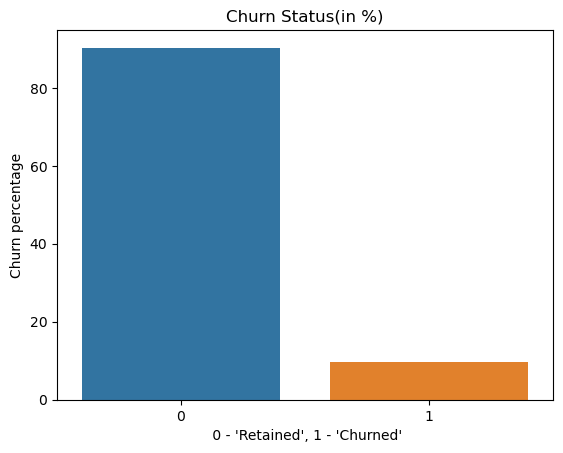

In [21]:
sns.barplot(x=churn_percentage.index, y=churn_percentage['Companies'])
plt.xlabel(" 0 - 'Retained', 1 - 'Churned'")   
plt.ylabel("Churn percentage") # Y-axis label
plt.title("Churn Status(in %)") 

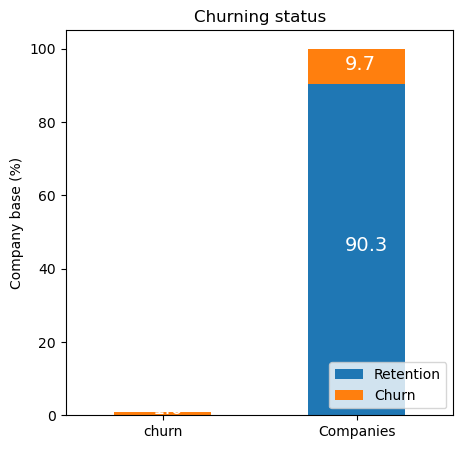

In [23]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of the total customers have churned.

### Churn Percentage by Channel Sales

In [25]:
channel = client_df[['id','channel_sales','churn']]
channel

,id,channel_sales,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,0
...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,0


In [26]:
channel_wise = channel.groupby([channel['channel_sales'],channel['churn']]).count().unstack(level=1).fillna(0)

In [27]:
channel_wise

id       
churn                                  0      1
channel_sales                                  
MISSING                           3442.0  283.0
epumfxlbckeskwekxbiuasklxalciiuu     3.0    0.0
ewpakwlliwisiwduibdlfmalxowmwpci   818.0   75.0
fixdbufsefwooaasfcxdxadsiekoceaa     2.0    0.0
foosdfpfkusacimwkcsosbicdxkicaua  5934.0  820.0
lmkebamcaaclubfxadlmueccxoimlema  1740.0  103.0
sddiedcslfslkckwlfkdpoeeailfpeds    11.0    0.0
usilxuppasemubllopkaafesmlibmsdf  1237.0  138.0

In [28]:
channel_churn = channel_wise['id'].apply(lambda x: 100*x/float(x.sum()), axis=1)
channel_churn.columns = ['churn(0)', 'churn(1)']
channel_churn = channel_churn.reset_index()

In [31]:
channel_churn

,channel_sales,churn(0),churn(1)
0,MISSING,92.402685,7.597315
1,epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
2,ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
3,fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
4,foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
5,lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
6,sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
7,usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364


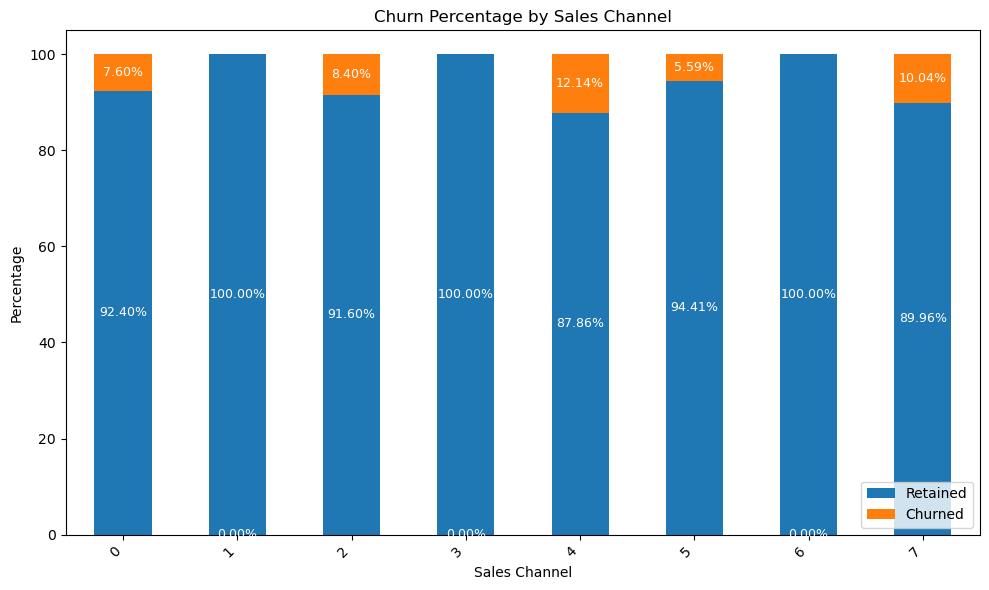

In [32]:
ax = channel_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Sales Channel')
plt.ylabel('Percentage')
plt.title('Churn Percentage by Sales Channel')
plt.xticks(rotation=45, ha='right') 
plt.legend(['Retained', 'Churned'],loc='lower right')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}%', ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

### Merging Client and Price DataFrame

In [34]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [35]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [36]:
powerco_df = pd.merge(client_df, price_df, on ='id', how = 'inner')

In [37]:
powerco_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


### Distribution of Energy Consumption

In [39]:
consumption = client_df[['cons_12m' , 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year', 'churn']]

In [40]:
consumption.head(3)

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,forecast_cons_12m,forecast_cons_year,churn
0,0,54946,0,0.0,0.00,0,1
1,4660,0,0,0.0,189.95,0,0
2,544,0,0,0.0,47.96,0,0


In [41]:
consumption.groupby(consumption['churn']).sum()

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,forecast_cons_12m,forecast_cons_year
churn,,,,,,
0,2213665644,397212185,224790245,2017138.69,24507687.84,18494604
1,111905857,13105049,10224235,214466.71,2785301.09,1950333


F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

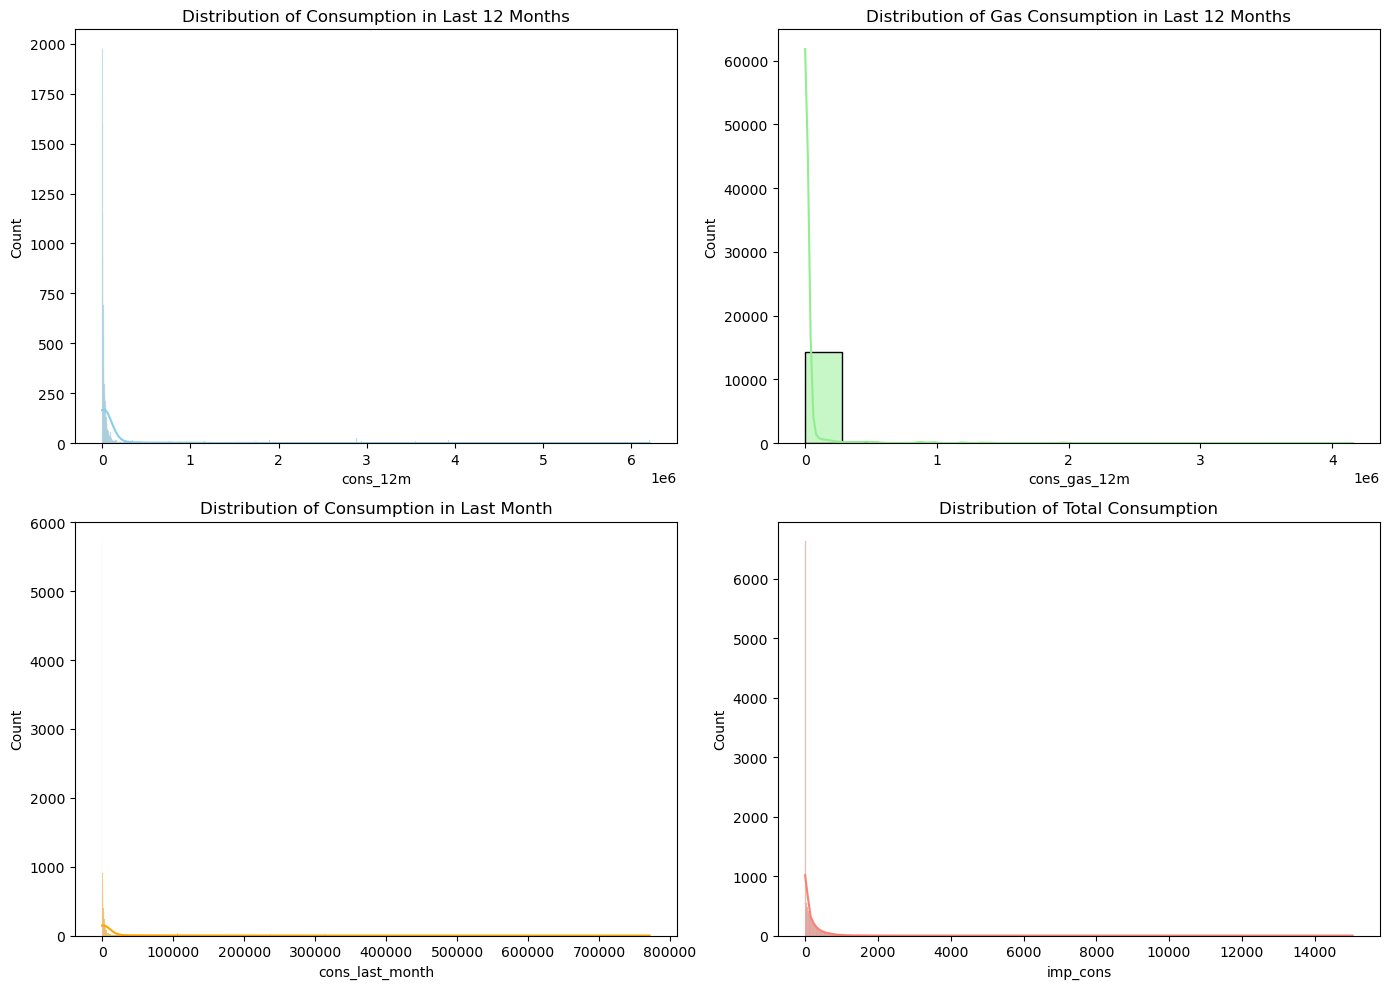

In [42]:

# Plotting distribution of consumption data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for 'cons_12m'
sns.histplot(consumption['cons_12m'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Consumption in Last 12 Months')

# Plot for 'cons_gas_12m'
sns.histplot(consumption['cons_gas_12m'], kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Gas Consumption in Last 12 Months')

# Plot for 'cons_last_month'
sns.histplot(consumption['cons_last_month'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Consumption in Last Month')

# Plot for 'imp_cons'
sns.histplot(consumption['imp_cons'], kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Distribution of Total Consumption')

plt.tight_layout()
plt.show()

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers.
1) Consumption in the Last 12 Months (cons_12m): The distribution is skewed to the right, indicating that most customers have lower consumption, but there are a few with significantly higher usage.

2) Gas Consumption in the Last 12 Months (cons_gas_12m): Similar to cons_12m, this distribution is also right-skewed, suggesting a similar trend in gas consumption.

3) Consumption in the Last Month (cons_last_month): This distribution is more centered but still skewed to the right. Most customers seem to have low to moderate usage in the last month.

4) Total Consumption (imp_cons): The total consumption also shows a right-skewed distribution with a few customers having extremely high consumption.

Text(0.5, 1.0, 'Total consumption vs churn')

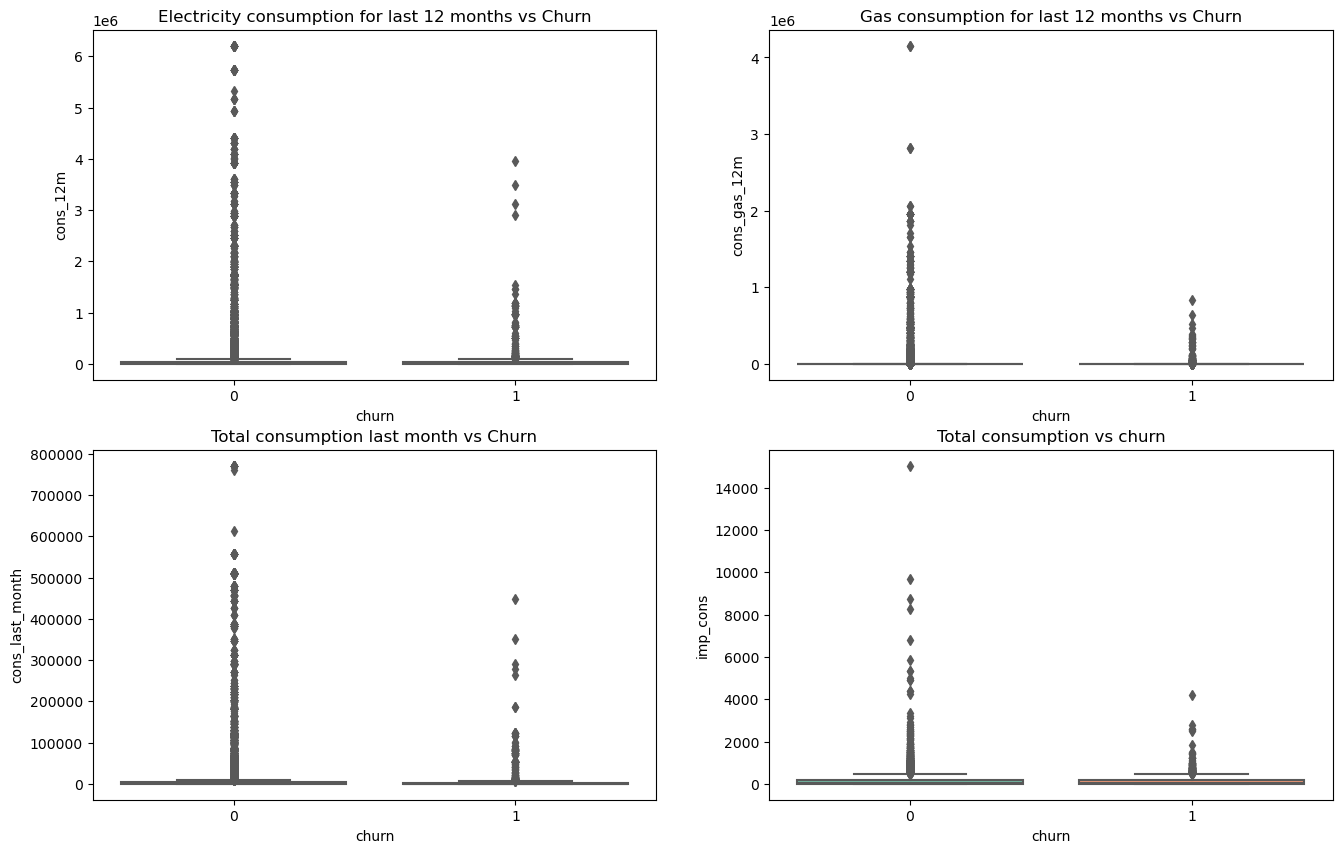

In [44]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

sns.boxplot(data=consumption, x='churn', y='cons_12m', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Electricity consumption for last 12 months vs Churn')
                    
sns.boxplot(data=consumption, x='churn', y='cons_gas_12m', ax=axes[0,1],palette='Set2')
axes[0,1].set_title('Gas consumption for last 12 months vs Churn')               
                    
sns.boxplot(data=consumption, x='churn', y='cons_last_month', ax=axes[1,0],palette='Set2')
axes[1,0].set_title('Total consumption last month vs Churn')
                    
sns.boxplot(data=consumption, x='churn', y='imp_cons', ax=axes[1,1],palette='Set2')
axes[1,1].set_title('Total consumption vs churn')

The plots indicate that non-churned customers generally have higher consumption values, especially in the cons_12m and cons_last_month metrics. The distributions for churned customers tend to be more centered around lower values.

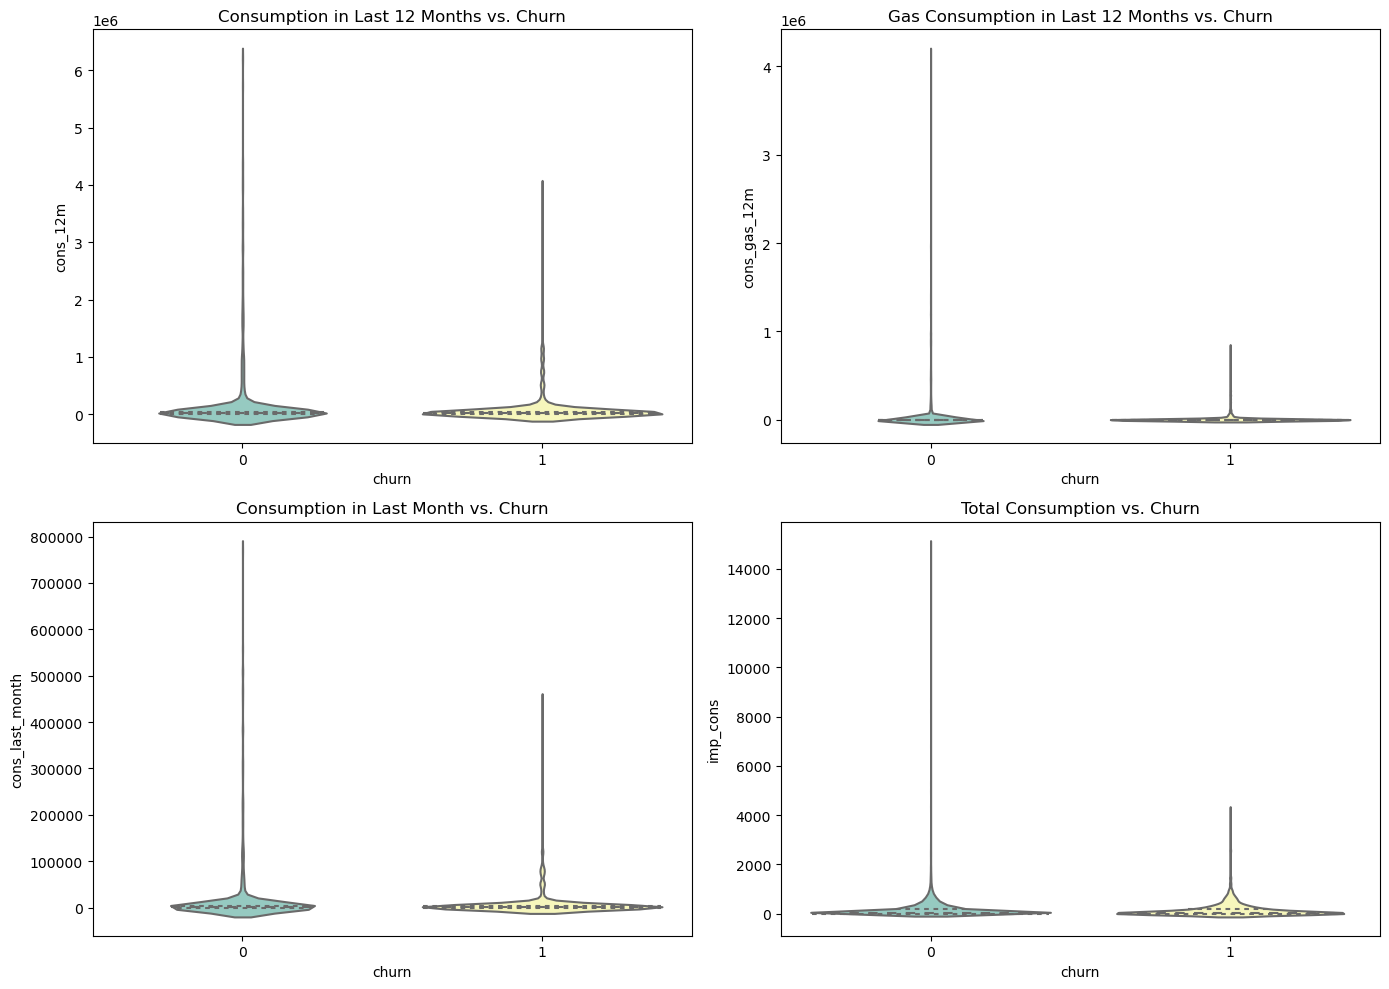

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.violinplot(x='churn', y='cons_12m', data=consumption, ax=axes[0, 0], palette="Set3", inner="quartile")
axes[0, 0].set_title('Consumption in Last 12 Months vs. Churn')

# Violin plot for 'cons_gas_12m' vs. 'churn'
sns.violinplot(x='churn', y='cons_gas_12m', data=consumption, ax=axes[0, 1], palette="Set3", inner="quartile")
axes[0, 1].set_title('Gas Consumption in Last 12 Months vs. Churn')

# Violin plot for 'cons_last_month' vs. 'churn'
sns.violinplot(x='churn', y='cons_last_month', data=consumption, ax=axes[1, 0], palette="Set3", inner="quartile")
axes[1, 0].set_title('Consumption in Last Month vs. Churn')

# Violin plot for 'imp_cons' vs. 'churn'
sns.violinplot(x='churn', y='imp_cons', data=consumption, ax=axes[1, 1], palette="Set3", inner="quartile")
axes[1, 1].set_title('Total Consumption vs. Churn')

plt.tight_layout()

In [47]:
mean_median_consumption =consumption.groupby('churn').agg({
    'cons_12m' : ['mean','median'],
    'cons_gas_12m': ['mean','median'],
    'cons_last_month': ['mean','median'],
    'imp_cons': ['mean','median']
})

mean_median_consumption.transpose().round()

churn                          0        1
cons_12m        mean    167867.0  78862.0
                median   14075.0  14529.0
cons_gas_12m    mean     30121.0   9235.0
                median       0.0      0.0
cons_last_month mean     17046.0   7205.0
                median     800.0    740.0
imp_cons        mean       153.0    151.0
                median      37.0     41.0

Non-churned customers generally have higher mean and median values across most consumption metrics, suggesting that higher 
consumption could correlate with lower churn rates.

In [49]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [50]:
cons_over_time = client_df[['cons_12m','cons_gas_12m','cons_last_month','imp_cons','date_activ','date_end','churn']]

In [51]:
cons_over_time

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,date_activ,date_end,churn
0,0,54946,0,0.00,15-06-2013,15-06-2016,1
1,4660,0,0,0.00,21-08-2009,30-08-2016,0
2,544,0,0,0.00,16-04-2010,16-04-2016,0
3,1584,0,0,0.00,30-03-2010,30-03-2016,0
4,4425,0,526,52.32,13-01-2010,07-03-2016,0
...,...,...,...,...,...,...,...
14601,32270,47940,0,0.00,24-05-2012,08-05-2016,0
14602,7223,0,181,15.94,27-08-2012,27-08-2016,1
14603,1844,0,179,18.05,08-02-2012,07-02-2016,1
14604,131,0,0,0.00,30-08-2012,30-08-2016,0


C:\Users\hp\AppData\Local\Temp\ipykernel_9824\2646526478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_over_time['date_end'] = pd.to_datetime(cons_over_time['date_end'], format='%d-%m-%Y')
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.

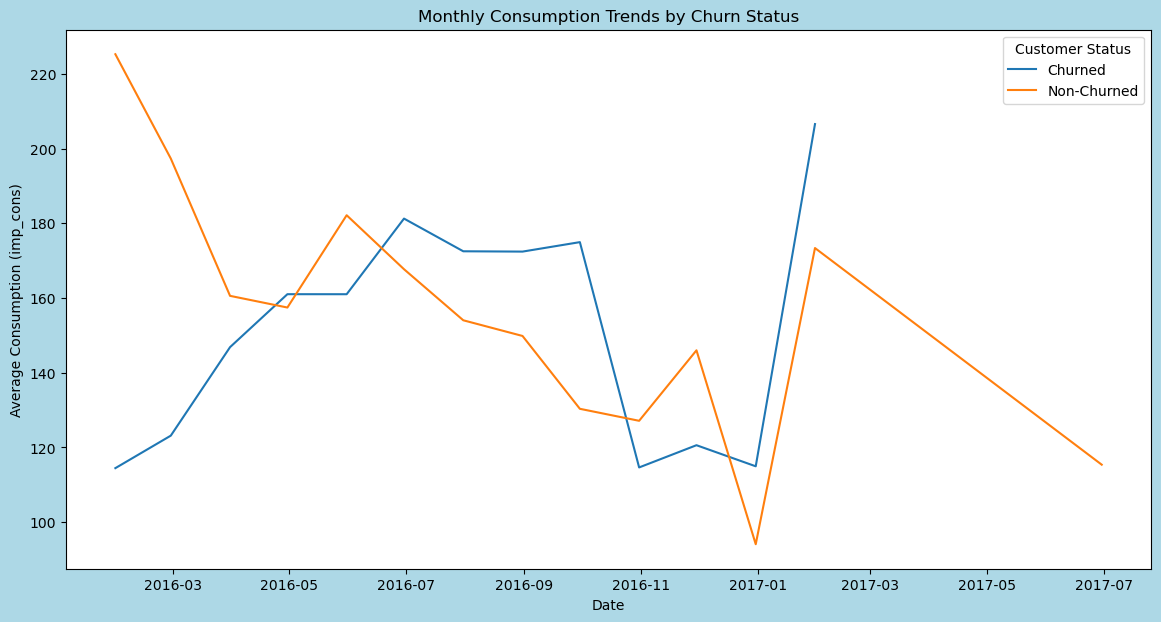

<Figure size 640x480 with 0 Axes>

In [52]:
cons_over_time['date_end'] = pd.to_datetime(cons_over_time['date_end'], format='%d-%m-%Y')

numeric_columns = cons_over_time.select_dtypes(include='number').columns

# Step 3: Segment the data by churn status and resample
monthly_consumption_churned = cons_over_time[cons_over_time['churn'] == 1].copy()
monthly_consumption_non_churned = cons_over_time[cons_over_time['churn'] == 0].copy()

# Resample to monthly and calculate the mean consumption only for numeric columns
monthly_consumption_churned = monthly_consumption_churned.resample('M', on='date_end')[numeric_columns].mean()
monthly_consumption_non_churned = monthly_consumption_non_churned.resample('M', on='date_end')[numeric_columns].mean()

# Step 4: Plot the trends for churned and non-churned customers
plt.figure(figsize=(14, 7),facecolor = 'lightblue')
sns.lineplot(data=monthly_consumption_churned, x=monthly_consumption_churned.index, y='imp_cons', label='Churned')
sns.lineplot(data=monthly_consumption_non_churned, x=monthly_consumption_non_churned.index, y='imp_cons', label='Non-Churned')
plt.title('Monthly Consumption Trends by Churn Status')
plt.xlabel('Date')
plt.ylabel('Average Consumption (imp_cons)')
plt.legend(title='Customer Status')
plt.show()

plt.savefig('consunption_over_time.jpg')

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

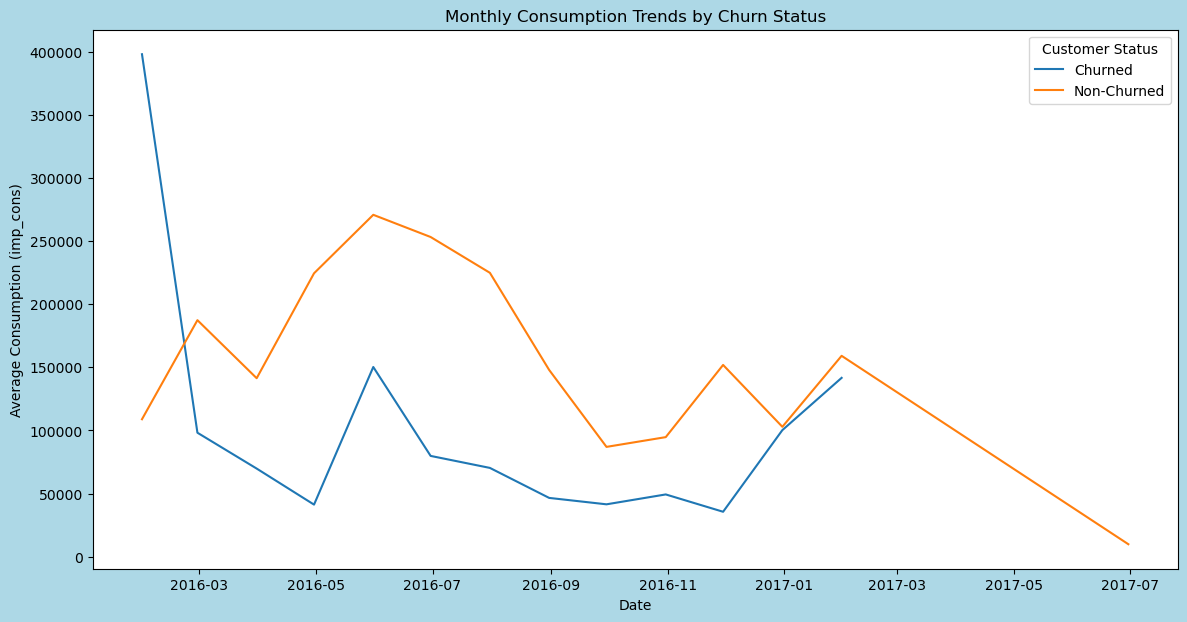

In [53]:
plt.figure(figsize=(14, 7),facecolor = 'lightblue')
sns.lineplot(data=monthly_consumption_churned, x=monthly_consumption_churned.index, y='cons_12m', label='Churned')
sns.lineplot(data=monthly_consumption_non_churned, x=monthly_consumption_non_churned.index, y='cons_12m', label='Non-Churned')
plt.title('Monthly Consumption Trends by Churn Status')
plt.xlabel('Date')
plt.ylabel('Average Consumption (imp_cons)')
plt.legend(title='Customer Status')
plt.show()

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

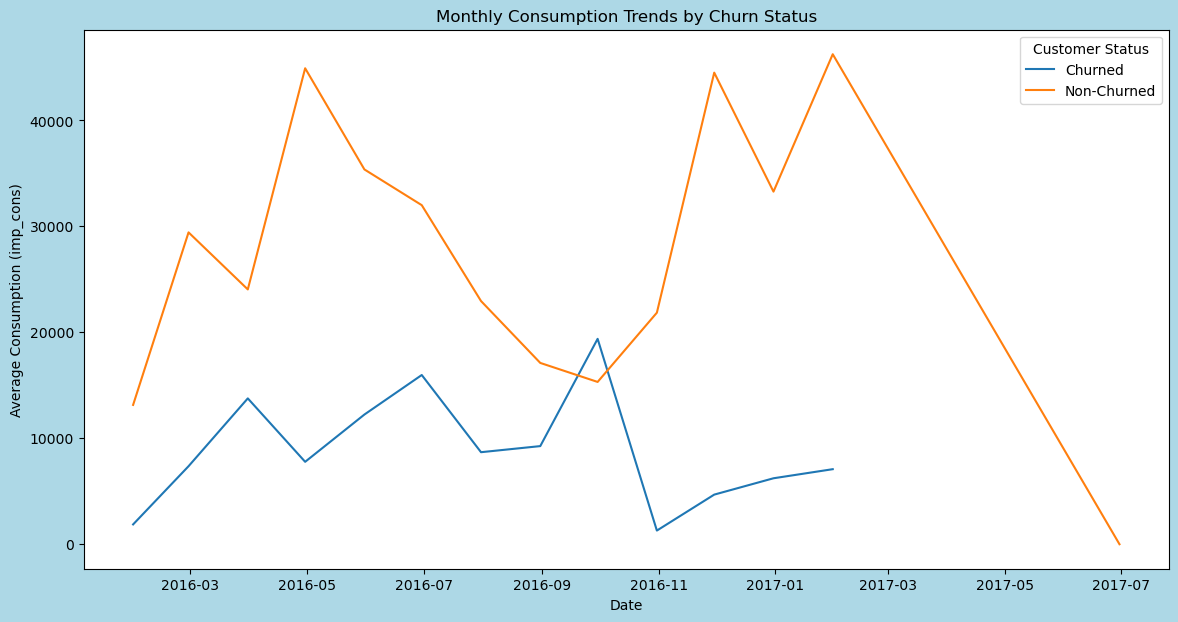

In [54]:
plt.figure(figsize=(14, 7),facecolor = 'lightblue')
sns.lineplot(data=monthly_consumption_churned, x=monthly_consumption_churned.index, y='cons_gas_12m', label='Churned')
sns.lineplot(data=monthly_consumption_non_churned, x=monthly_consumption_non_churned.index, y='cons_gas_12m', label='Non-Churned')
plt.title('Monthly Consumption Trends by Churn Status')
plt.xlabel('Date')
plt.ylabel('Average Consumption (imp_cons)')
plt.legend(title='Customer Status')
plt.show()

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

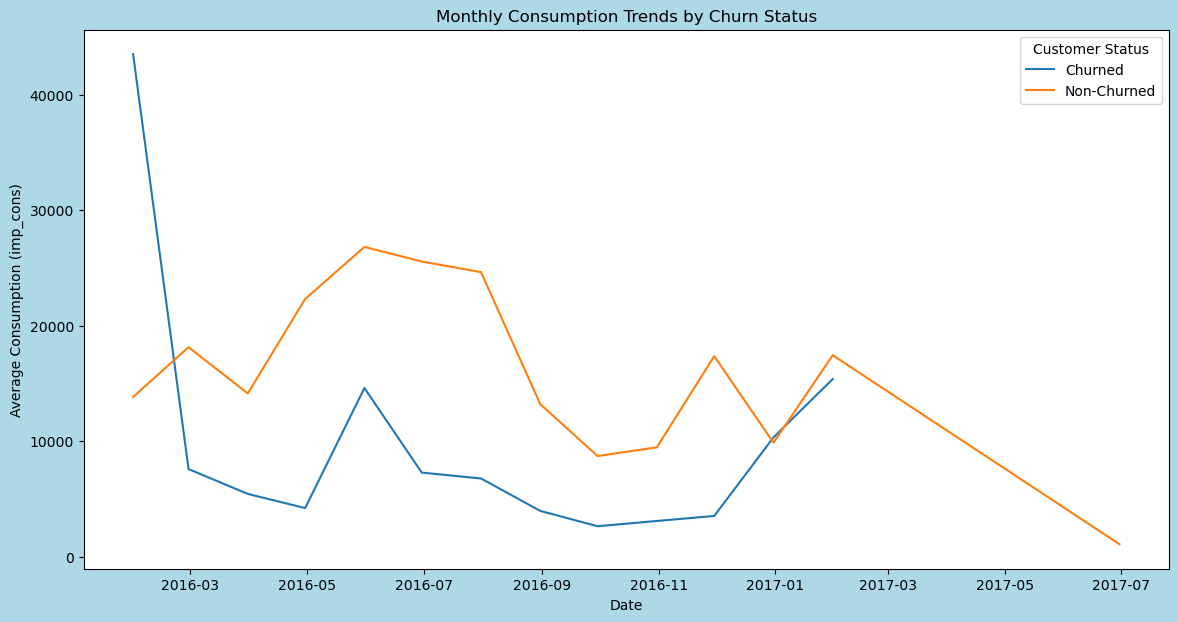

In [55]:
plt.figure(figsize=(14, 7),facecolor = 'lightblue')
sns.lineplot(data=monthly_consumption_churned, x=monthly_consumption_churned.index, y='cons_last_month', label='Churned')
sns.lineplot(data=monthly_consumption_non_churned, x=monthly_consumption_non_churned.index, y='cons_last_month', label='Non-Churned')
plt.title('Monthly Consumption Trends by Churn Status')
plt.xlabel('Date')
plt.ylabel('Average Consumption (imp_cons)')
plt.legend(title='Customer Status')
plt.show()

## Forecast

In [57]:
powerco_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [58]:
forecast = powerco_df[["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]]

In [59]:
forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0,0,1.78,0.114481,0.098142,40.606701,1
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,0,0,1.78,0.114481,0.098142,40.606701,1
2,24011ae4ebbe3035111d65fa7c15bc57,0.0,0,0,1.78,0.114481,0.098142,40.606701,1
3,24011ae4ebbe3035111d65fa7c15bc57,0.0,0,0,1.78,0.114481,0.098142,40.606701,1
4,24011ae4ebbe3035111d65fa7c15bc57,0.0,0,0,1.78,0.114481,0.098142,40.606701,1


F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

<Axes: xlabel='forecast_price_pow_off_peak', ylabel='Count'>

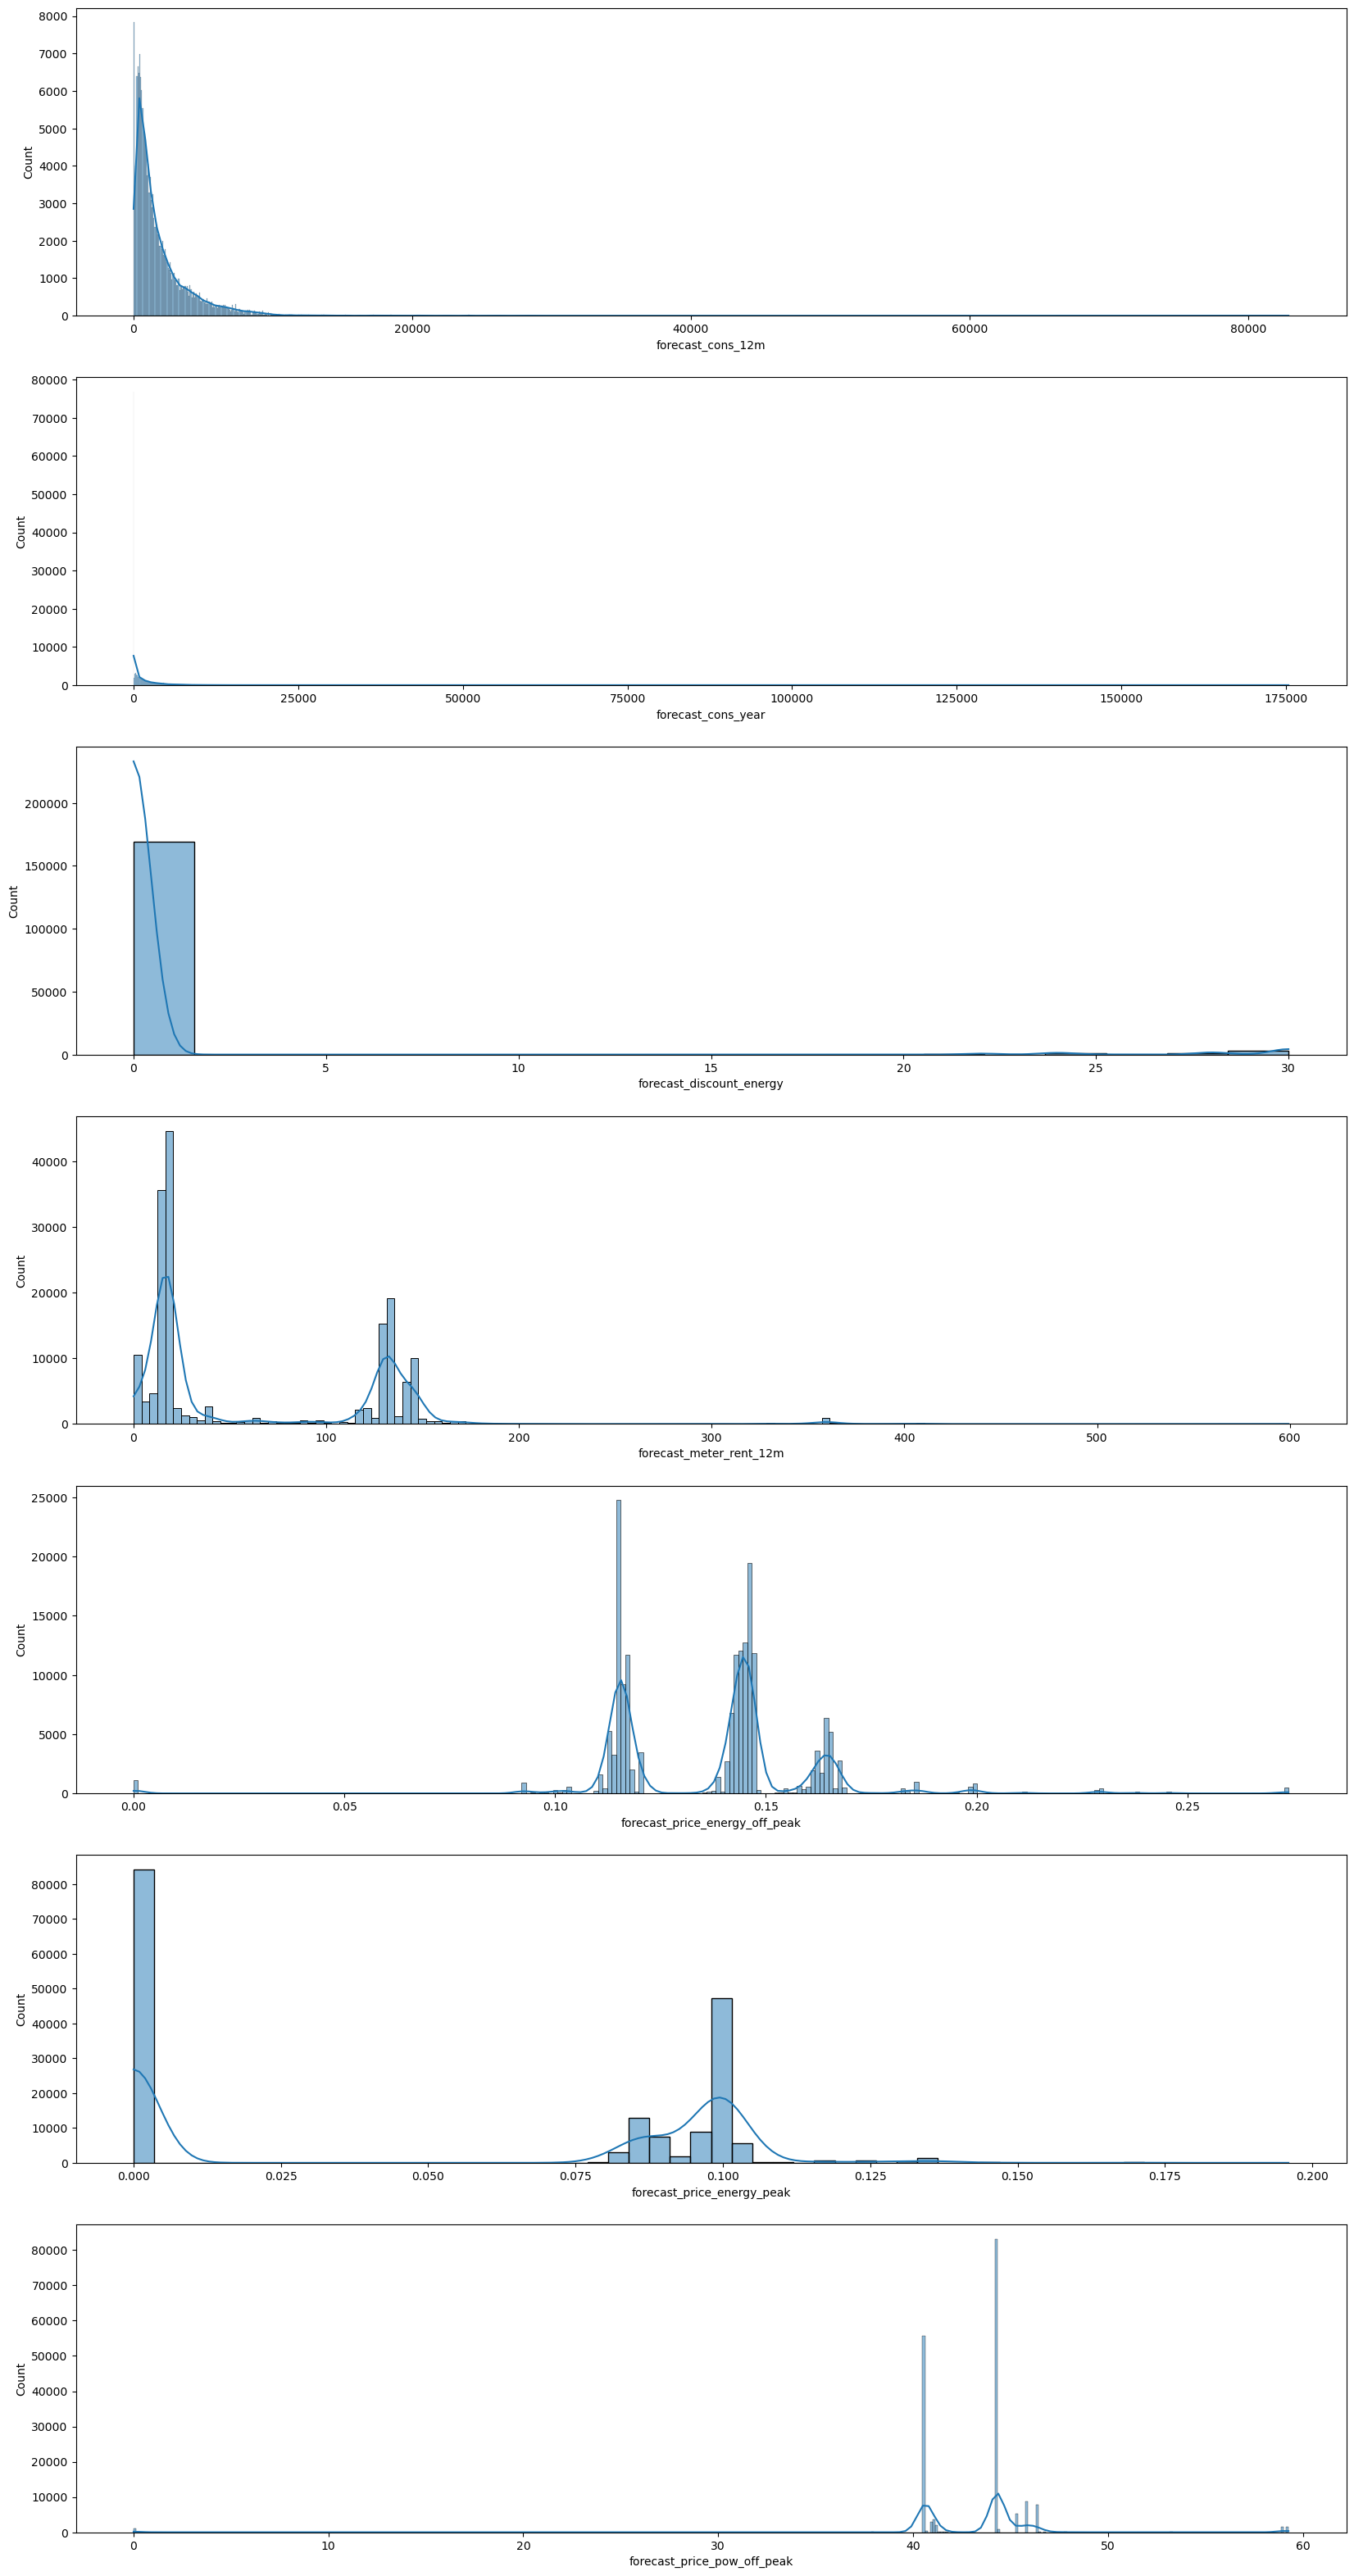

In [60]:
fig,axes = plt.subplots(nrows=7, figsize=(20,40))

sns.histplot(forecast['forecast_cons_12m'], ax=axes[0], kde =True)
sns.histplot(forecast['forecast_cons_year'], ax=axes[1], kde =True)
sns.histplot(forecast['forecast_discount_energy'], ax=axes[2], kde =True)
sns.histplot(forecast['forecast_meter_rent_12m'], ax=axes[3], kde =True)
sns.histplot(forecast['forecast_price_energy_off_peak'], ax=axes[4], kde =True)
sns.histplot(forecast['forecast_price_energy_peak'], ax=axes[5], kde =True)
sns.histplot(forecast['forecast_price_pow_off_peak'], ax=axes[6], kde =True)

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

<Axes: xlabel='forecast_price_pow_off_peak'>

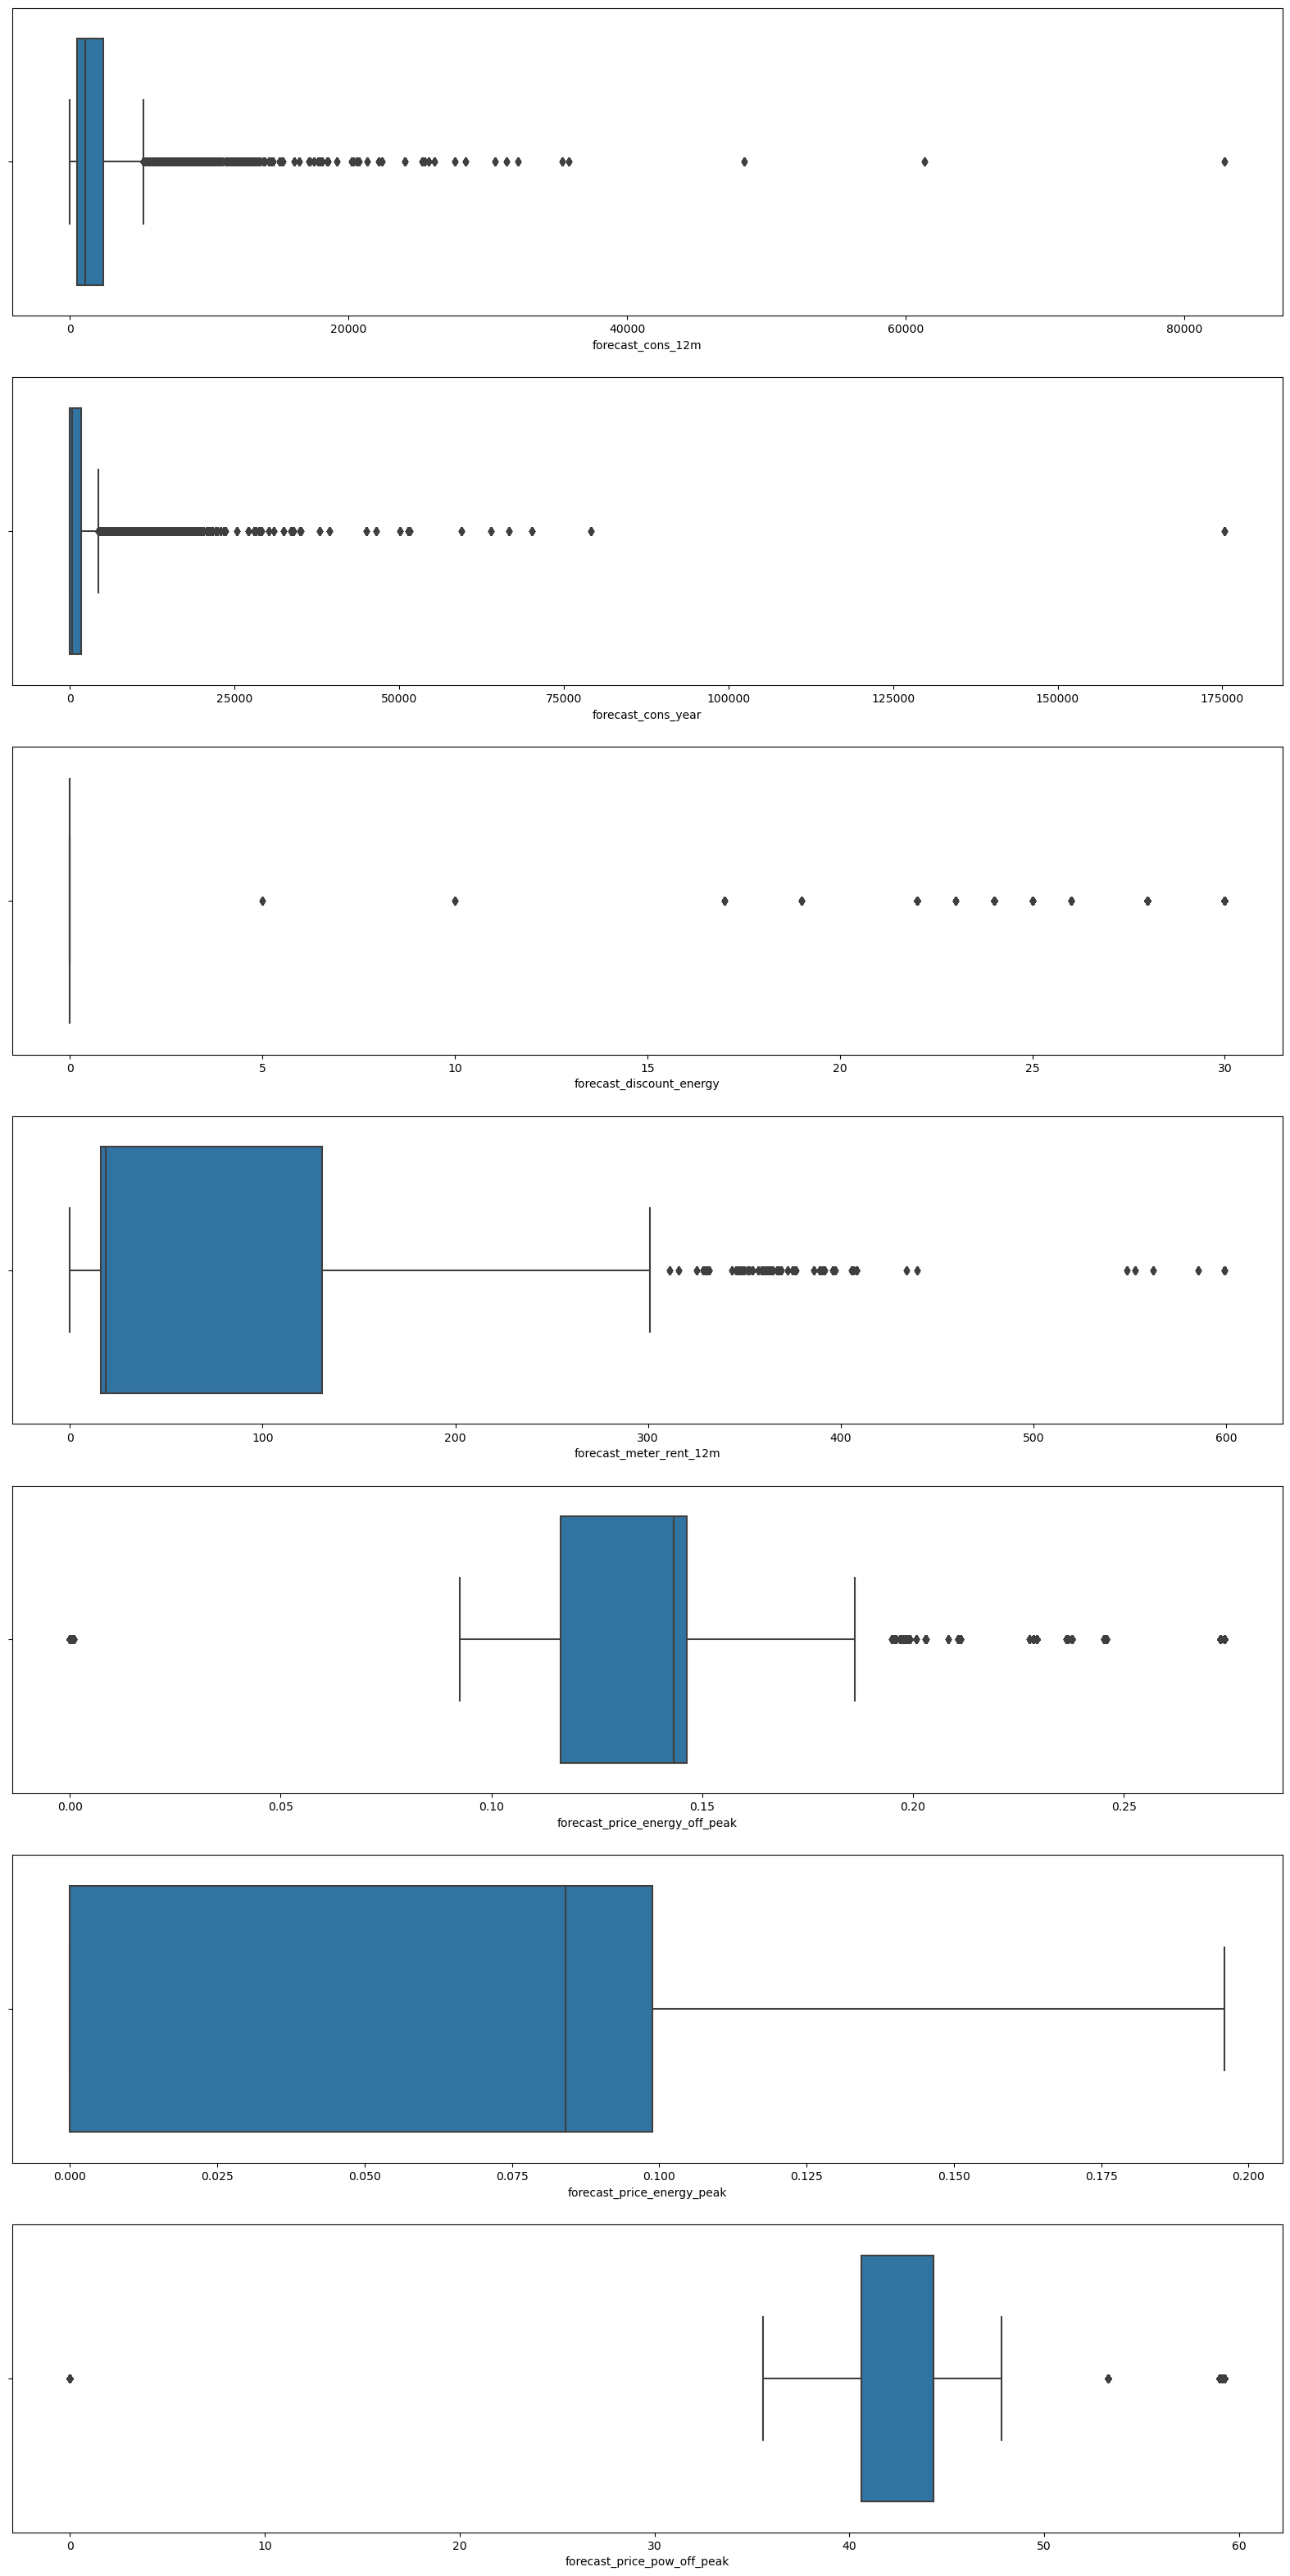

In [61]:
fig, axes = plt.subplots(nrows =7, figsize=(20,40))

sns.boxplot(x=forecast['forecast_cons_12m'],ax=axes[0])
sns.boxplot(x=forecast['forecast_cons_year'],ax=axes[1])
sns.boxplot(x=forecast['forecast_discount_energy'],ax=axes[2])
sns.boxplot(x=forecast['forecast_meter_rent_12m'],ax=axes[3])
sns.boxplot(x=forecast['forecast_price_energy_off_peak'],ax=axes[4])
sns.boxplot(x=forecast['forecast_price_energy_peak'],ax=axes[5])
sns.boxplot(x=forecast['forecast_price_pow_off_peak'],ax=axes[6])

## Contract Type 

In [63]:
powerco_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [64]:
contract_type = powerco_df[['id','has_gas', 'churn']]
contract =contract_type.groupby(['has_gas','churn']).count().unstack(level=1)
contract_churn = contract.apply(lambda x: 100*x/x.sum(),axis=1)
contract_churn

id           
churn            0          1
has_gas                      
f        89.956335  10.043665
t        91.807456   8.192544

In [65]:
contract_churn 

id           
churn            0          1
has_gas                      
f        89.956335  10.043665
t        91.807456   8.192544

Text(0, 0.5, 'company%')

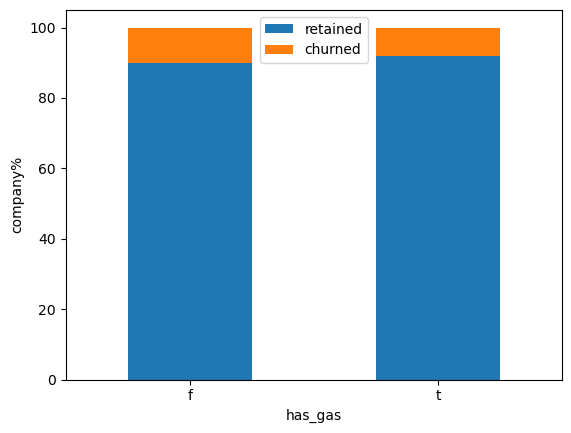

In [66]:
contract_churn.plot(kind='bar' , stacked=True, rot=0)
plt.legend(['retained','churned'],loc='upper center')
plt.ylabel('company%')

## Margin

In [68]:
powerco_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [69]:
margin = powerco_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

<Axes: xlabel='net_margin'>

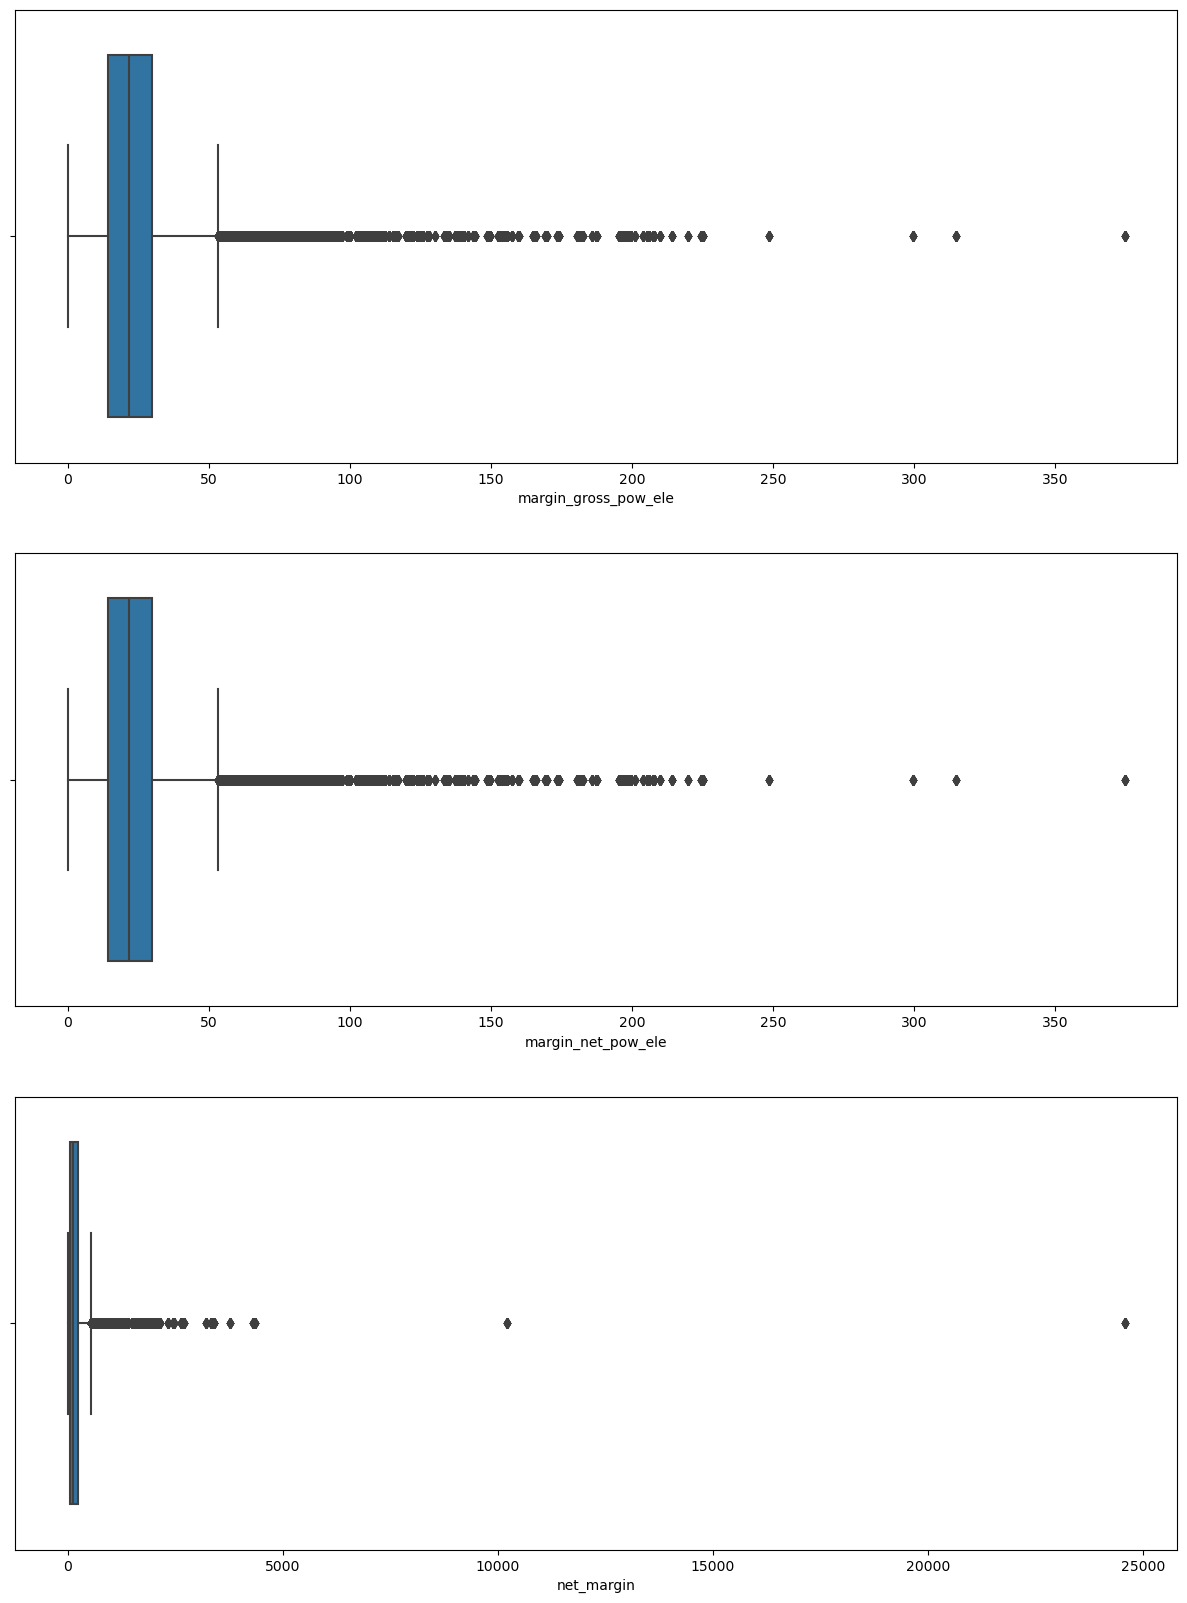

In [70]:
fig,axes = plt.subplots(nrows=3, figsize=(15,20))

sns.boxplot(x=margin['margin_gross_pow_ele'], ax=axes[0])
sns.boxplot(x=margin['margin_net_pow_ele'], ax=axes[1])
sns.boxplot(x=margin['net_margin'], ax=axes[2])

## Subcribed Power

In [72]:
power = powerco_df[['id','pow_max','churn']]
power.head()

,id,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
1,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
2,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
3,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
4,24011ae4ebbe3035111d65fa7c15bc57,43.648,1


In [73]:
powerdf = pd.DataFrame({"Retention" : power[power["churn"]==0]["pow_max"],
                        "Churn" : power[power["churn"]==1]["pow_max"]})

[]

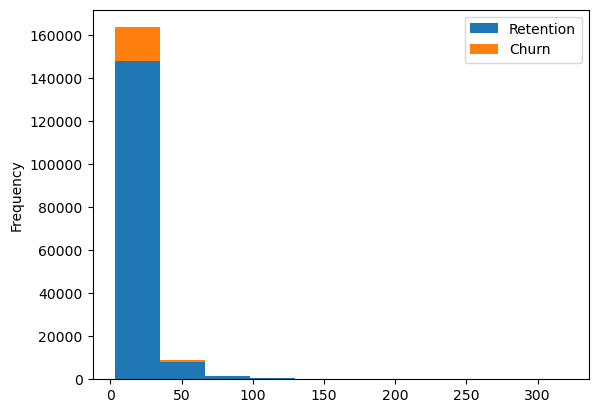

In [74]:
powerdf[["Retention","Churn"]].plot.hist(stacked =True)
plt.plot()

## Other Categories

In [77]:
active = powerco_df[['id','nb_prod_act','num_years_antig','origin_up','churn']]


In [88]:
active['nb_prod_act'].unique()

array([ 2,  1,  3,  4,  5,  9,  6,  8, 32, 10], dtype=int64)

Text(0.5, 1.0, 'Churned vs Retained based on Active Products')

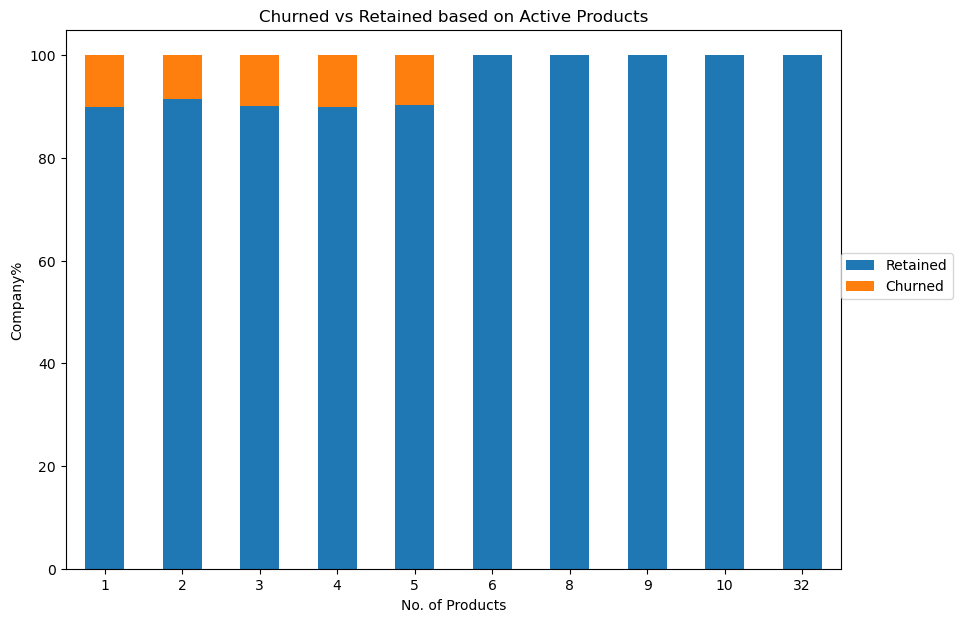

In [124]:

active_origin = active.groupby([active['nb_prod_act'],active['churn']])['id'].count().unstack().fillna(0)
active_percentage=active_origin.apply(lambda x: 100*x/x.sum(),axis=1)
active_percentage.plot(kind='bar',stacked=True,rot=0,figsize=(10,7))

plt.legend(('Retained','Churned'),loc=(1,0.5))
plt.xlabel('No. of Products')
plt.ylabel('Company%')
plt.title('Churned vs Retained based on Active Products')


In [126]:
active.head()

,id,nb_prod_act,num_years_antig,origin_up,churn
0,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1
1,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1
2,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1
3,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1
4,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1


In [128]:
active['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [146]:
active_origin = active.groupby([active['origin_up'],active['churn']])['id'].count().unstack().fillna(0)
active_origin_pert = active_origin.apply(lambda x: 100*x/x.sum(),axis=1)

In [246]:
sorted = active_origin_pert.sort_index(ascending=False)
sorted.columns=[['Retained','Churned']]

AttributeError: 'function' object has no attribute 'sort_values'

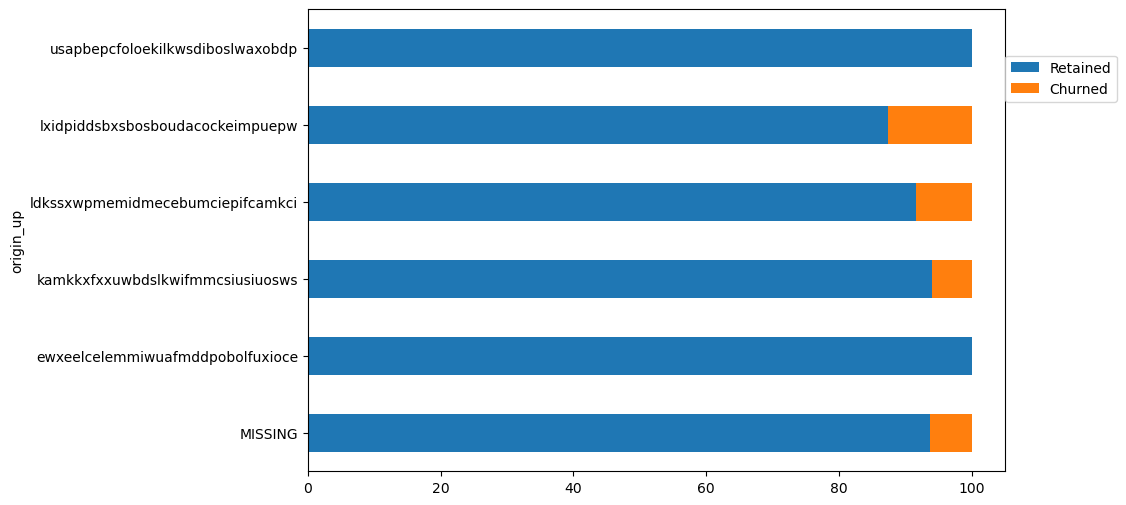

In [238]:
active_origin_pert.plot(kind='barh',stacked = True,figsize=(9,6))
plt.legend(('Retained','Churned'), loc=(1,0.8))

In [316]:
active_antig=active.groupby(['num_years_antig','churn'])['id'].count().unstack().fillna(0)
active_antig=active_antig.reset_index()
active_antig.columns=['num_years_antig','Retained','Churned']
active_antig=active_antig.set_index('num_years_antig')

<Axes: xlabel='num_years_antig'>

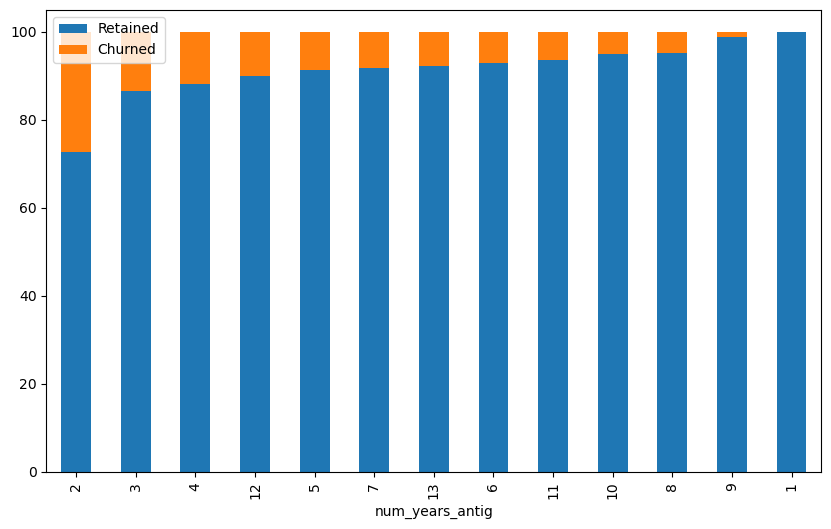

In [328]:
active_antig_pert = active_antig.apply(lambda x:100*x/x.sum(),axis=1)
active_antig_pert=active_antig_pert.sort_values(by='Retained')
active_antig_pert.plot(kind='bar',stacked=True,figsize=(10,6),rot=0)